In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [219]:
x = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv', header=None)
y = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv', header=None)

In [220]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [221]:
y.head()

,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


In [222]:
x.shape, y.shape

((387, 5), (387, 1))

In [223]:
binary = LinearRegression()

In [224]:
binary.fit(x[[1]], y)

LinearRegression()

In [225]:
binary.coef_

array([[95.52010745]])

In [226]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

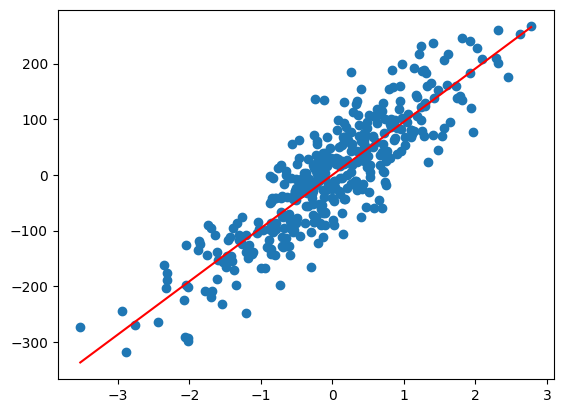

In [227]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [228]:
binary.score(x[[1]], y)

0.7699743283650629

In [229]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

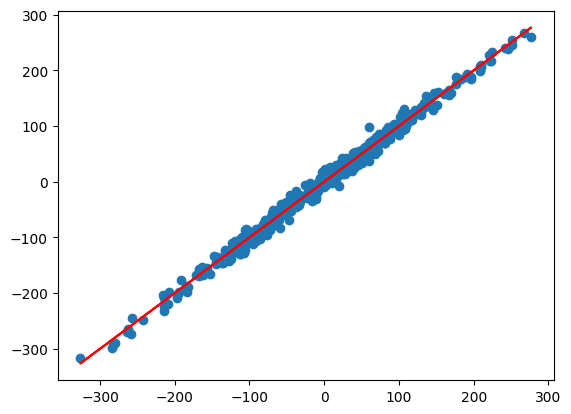

In [230]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

### Самостоятельная работа

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [231]:
def lin_reg(X, Y):
    reg = LinearRegression()
    reg.fit(X, Y)
    
    print('R2_score = ', reg.score(X, Y))
    
    plt.scatter(X, Y)
    xx = np.linspace(X.min(), X.max(), 100).reshape((-1, 1))
    plt.plot(xx, reg.predict(xx), c='r')

R2_score =  0.04364336234689348


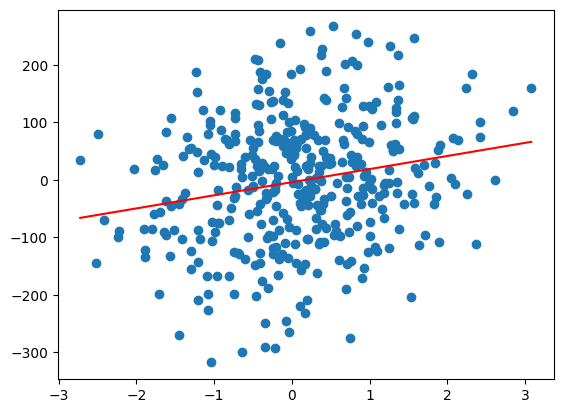

In [232]:
lin_reg(x[[0]], y)


R2_score =  0.7699743283650629


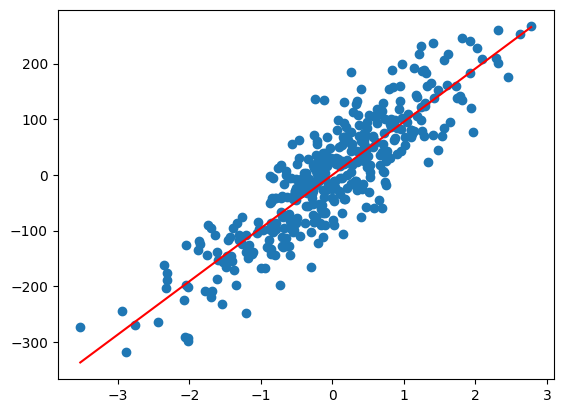

In [233]:
lin_reg(x[[1]], y)

R2_score =  0.18794528514998887


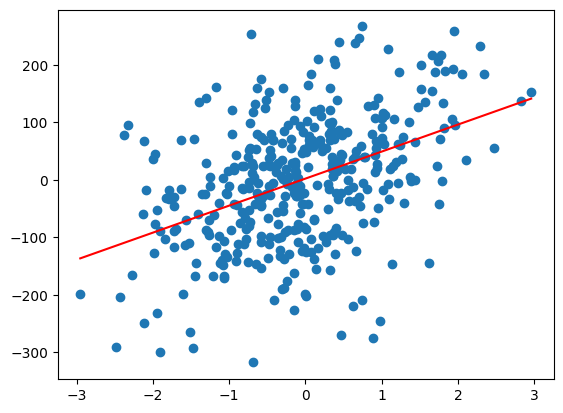

In [234]:
lin_reg(x[[2]], y)

R2_score =  0.047470345664983093


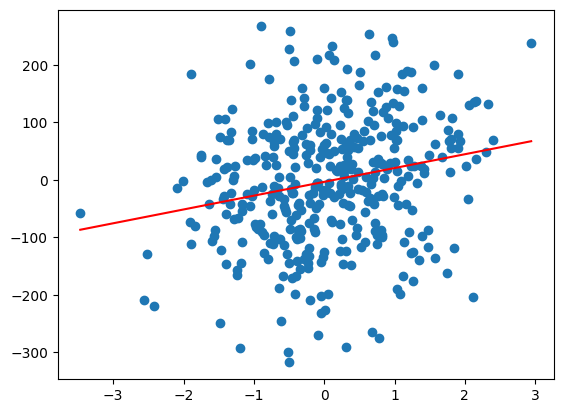

In [235]:
lin_reg(x[[3]], y)

R2_score =  0.00017176151145947838


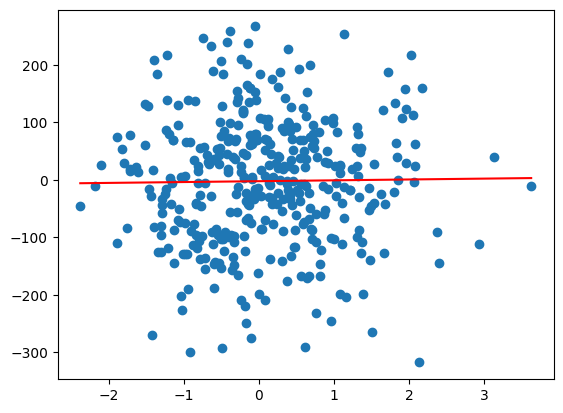

In [236]:
lin_reg(x[[4]], y)

2. Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

R2_score для признаков [0]: 0.04364336234689348


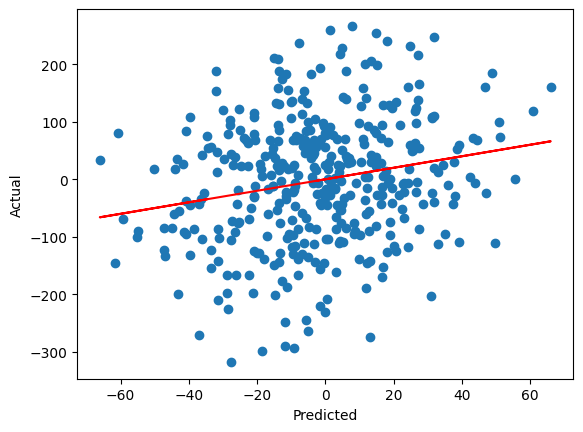

R2_score для признаков [0, 1, 2]: 0.9128152175612697


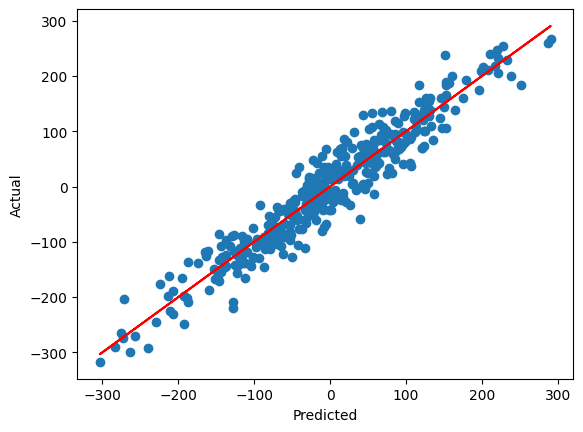

R2_score для признаков [0, 1, 2, 3, 4]: 0.9922198026415868


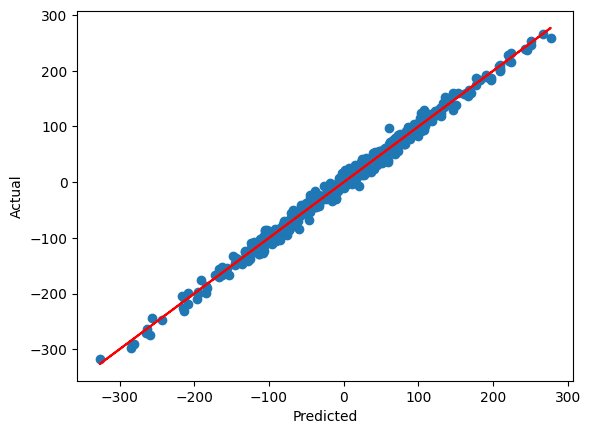

In [237]:
def lin_reg_multiple(X, Y):
    reg = LinearRegression()
    reg.fit(X, Y)
    
    print(f'R2_score для признаков {X.columns.tolist()}: {reg.score(X, Y)}')
    
    yy = reg.predict(X)
    plt.scatter(yy, Y)
    plt.plot(yy, yy, c='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
        
    return reg


model1 = lin_reg_multiple(x[[0]], y)
model2 = lin_reg_multiple(x[[0, 1, 2]], y)
model_all = lin_reg_multiple(x, y)

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [238]:
from sklearn.preprocessing import PolynomialFeatures

In [239]:
def pol_reg_2(X, Y):
    reg = PolynomialFeatures(degree=2) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)
    
    return lr.score(X_pol, Y)
    
def pol_reg_3(X, Y):
    reg = PolynomialFeatures(degree=3) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)
    
    return lr.score(X_pol, Y)
    
def pol_reg_10(X, Y):
    reg = PolynomialFeatures(degree=10) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)
    
    return lr.score(X_pol, Y)

In [240]:
for n in range(0,5):
    print(f'R2_score для {n} признака:')
    print(f'Полином 2 степени: {pol_reg_2(x[[n]], y)} \nПолином 3 степени: {pol_reg_3(x[[n]], y)} \nПолином 10 степени: {pol_reg_10(x[[n]], y)}\n');

R2_score для 0 признака:
Полином 2 степени: 0.04367170367915507 
Полином 3 степени: 0.04376506816920167 
Полином 10 степени: 0.05035596325168745

R2_score для 1 признака:
Полином 2 степени: 0.7699942588883133 
Полином 3 степени: 0.7711184109235001 
Полином 10 степени: 0.7726769307411921

R2_score для 2 признака:
Полином 2 степени: 0.19000787278473819 
Полином 3 степени: 0.19280163734543854 
Полином 10 степени: 0.20440944561264418

R2_score для 3 признака:
Полином 2 степени: 0.04794250960519941 
Полином 3 степени: 0.05031163217811918 
Полином 10 степени: 0.07266746559268988

R2_score для 4 признака:
Полином 2 степени: 0.0010490365524417067 
Полином 3 степени: 0.0010646025332345932 
Полином 10 степени: 0.0450526417134679



Регрессия наиболее значима при полиноме 10 степени для всех признаков

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [241]:
def lin_reg(X, Y):
    reg = LinearRegression()
    reg.fit(X, Y)
    
    return reg.score(X, Y)

In [242]:
table = pd.DataFrame({'Признак': [0, 1, 2, 3, 4], 'Линейная регрессия': [lin_reg(x[[0]], y), lin_reg(x[[1]], y), lin_reg(x[[2]], y), lin_reg(x[[3]], y), lin_reg(x[[4]], y)], 'Полиномиальная регрессия 2': [pol_reg_2(x[[0]], y), pol_reg_2(x[[1]], y), pol_reg_2(x[[2]], y), pol_reg_2(x[[3]], y), pol_reg_2(x[[4]], y)], 'Полиномиальная регрессия 3': [pol_reg_3(x[[0]], y), pol_reg_3(x[[1]], y), pol_reg_3(x[[2]], y), pol_reg_3(x[[3]], y), pol_reg_3(x[[4]], y)], 'Полиномиальная регрессия 10': [pol_reg_10(x[[0]], y), pol_reg_10(x[[1]], y), pol_reg_10(x[[2]], y), pol_reg_10(x[[3]], y), pol_reg_10(x[[4]], y)]})
table

,Признак,Линейная регрессия,Полиномиальная регрессия 2,Полиномиальная регрессия 3,Полиномиальная регрессия 10
0,0,0.043643,0.043672,0.043765,0.050356
1,1,0.769974,0.769994,0.771118,0.772677
2,2,0.187945,0.190008,0.192802,0.204409
3,3,0.047470,0.047943,0.050312,0.072667
4,4,0.000172,0.001049,0.001065,0.045053


5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(X, Y, model):
    predictions = model.predict(X)
    
    print("Метрики качества:")
    print(f"R2 (коэффициент детерминации): {r2_score(Y, predictions):.4f}")
    print(f"MAE (средняя абсолютная ошибка): {mean_absolute_error(Y, predictions):.4f}")
    print(f"MSE (среднеквадратичная ошибка): {mean_squared_error(Y, predictions):.4f}")
    print(f"RMSE (корень из MSE): {np.sqrt(mean_squared_error(Y, predictions)):.4f}")
    print(f"Максимальная ошибка: {np.max(np.abs(Y - predictions)):.4f}")
    print(f"Медианная абсолютная ошибка: {np.median(np.abs(Y - predictions)):.4f}\n")

In [244]:
for n in range(0,5):
    print(f"Оценка линейной регрессии для признака {n}:")
    model = LinearRegression().fit(x[[n]], y)
    evaluate_regression(x[[n]], y, model)

for m in range(0,2):
    print(f"\nОценка полиномиальной регрессии (степень 2) для признака {m}:")
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(x[[m]])
    model_poly = LinearRegression().fit(X_poly, y)
    evaluate_regression(X_poly, y, model_poly)

Оценка линейной регрессии для признака 0:
Метрики качества:
R2 (коэффициент детерминации): 0.0436
MAE (средняя абсолютная ошибка): 85.7659
MSE (среднеквадратичная ошибка): 11492.2498
RMSE (корень из MSE): 107.2019
Максимальная ошибка: 289.7471
Медианная абсолютная ошибка: 72.5436

Оценка линейной регрессии для признака 1:
Метрики качества:
R2 (коэффициент детерминации): 0.7700
MAE (средняя абсолютная ошибка): 42.1316
MSE (среднеквадратичная ошибка): 2764.1493
RMSE (корень из MSE): 52.5752
Максимальная ошибка: 159.9656
Медианная абсолютная ошибка: 36.5380

Оценка линейной регрессии для признака 2:
Метрики качества:
R2 (коэффициент детерминации): 0.1879
MAE (средняя абсолютная ошибка): 77.4118
MSE (среднеквадратичная ошибка): 9758.2171
RMSE (корень из MSE): 98.7837
Максимальная ошибка: 317.7173
Медианная абсолютная ошибка: 62.6530

Оценка линейной регрессии для признака 3:
Метрики качества:
R2 (коэффициент детерминации): 0.0475
MAE (средняя абсолютная ошибка): 83.5868
MSE (среднеквадрати

6. Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [245]:

def poly_model(X, Y, degree_pol):
    reg = PolynomialFeatures(degree=degree_pol) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)

In [246]:
for degree in range(1, 11):
    print('Степень: ', degree)
    %timeit poly_model(x[[0]], y, degree)

Степень:  1
3.57 ms ± 222 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  2
3.65 ms ± 98.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  3
2.93 ms ± 411 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  4
2.58 ms ± 28.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  5
2.56 ms ± 37.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  6
2.63 ms ± 53.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  7
2.68 ms ± 102 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  8
2.72 ms ± 150 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  9
2.89 ms ± 189 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  10
2.98 ms ± 263 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


До полинома степени 5 время уменьшалось, после - увеличивалось. 